In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2
float64		column 2	1
float64		column 3	2
float64		column 4	1
float64		column 5	2
float64		column 6	1
float64		column 7	1
float64		column 8	2
float64		column 9	0
float64		column 10	2
float64		column 11	0
float64		column 12	0
float64		column 13	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,176.000000,177.000000,176.000000,177.000000,176.000000,177.000000,177.000000,176.000000,178.000000,176.000000,178.000000,178.000000,177.000000
mean,13.005966,2.343955,2.361761,19.511864,99.727273,2.296215,2.023842,0.361648,1.590899,5.047386,0.957449,2.611685,743.853107
std,0.808258,1.115683,0.272063,3.341377,14.315009,0.627453,0.999056,0.124249,0.572359,2.304037,0.228572,0.709990,313.170319
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.367500,1.610000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.240000,0.782500,1.937500,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.360000,2.130000,0.340000,1.555000,4.690000,0.965000,2.780000,672.000000
75%,13.682500,3.100000,2.542500,21.500000,107.000000,2.800000,2.860000,0.432500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

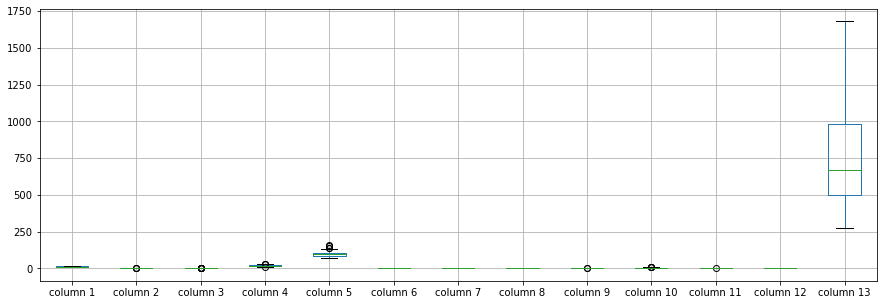

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.005966
column 2       2.343955
column 3       2.361761
column 4      19.511864
column 5      99.727273
column 6       2.296215
column 7       2.023842
column 8       0.361648
column 9       1.590899
column 10      5.047386
column 11      0.957449
column 12      2.611685
column 13    743.853107
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.085221,0.240522,-0.293474,0.282694,0.314217,0.275287,-0.138622,0.145353,0.546434,-0.068621,0.096503,0.644585
column 2,0.085221,1.000000,0.159553,0.279135,-0.030539,-0.341238,-0.412116,0.293416,-0.210124,0.234440,-0.560862,-0.373354,-0.187238
column 3,0.240522,0.159553,1.000000,0.440306,0.275869,0.117125,0.110793,0.169814,-0.008241,0.242007,-0.068164,0.005708,0.219856
column 4,-0.293474,0.279135,0.440306,1.000000,-0.075783,-0.315261,-0.343574,0.361366,-0.195501,0.014365,-0.269585,-0.275972,-0.451610
column 5,0.282694,-0.030539,0.275869,-0.075783,1.000000,0.208798,0.196461,-0.259379,0.233588,0.200554,0.052844,0.066784,0.396553
column 6,0.314217,-0.341238,0.117125,-0.315261,0.208798,1.000000,0.865577,-0.449800,0.612145,-0.051558,0.433164,0.700046,0.492655
column 7,0.275287,-0.412116,0.110793,-0.343574,0.196461,0.865577,1.000000,-0.535593,0.650484,-0.163489,0.540491,0.785970,0.484373
column 8,-0.138622,0.293416,0.169814,0.361366,-0.259379,-0.449800,-0.535593,1.000000,-0.370491,0.133196,-0.263791,-0.504899,-0.312876
column 9,0.145353,-0.210124,-0.008241,-0.195501,0.233588,0.612145,0.650484,-0.370491,1.000000,-0.023989,0.295544,0.519067,0.321435
column 10,0.546434,0.234440,0.242007,0.014365,0.200554,-0.051558,-0.163489,0.133196,-0.023989,1.000000,-0.520435,-0.417126,0.321702


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+21,13+21+21,13+21+21,13+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21+21+21,13+21+21+21+21+21,13+21+21+21+21,13+21+21+21,13+21+21,13+21,13], vae_layer = False, seed = 210)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 953.3672485351562
Epoch: 1 , loss: 949.8736738725142
Epoch: 2 , loss: 950.9960438121449
Epoch: 3 , loss: 954.0648304332386
Epoch: 4 , loss: 948.1434548117898
Epoch: 5 , loss: 956.679276899858
Epoch: 6 , loss: 946.5714333274148
Epoch: 7 , loss: 946.3733465021306
Epoch: 8 , loss: 954.3681529651989
Epoch: 9 , loss: 947.6220758611506
Epoch: 10 , loss: 948.8862249200994
Epoch: 11 , loss: 955.3142256303267
Epoch: 12 , loss: 951.0864979137074
Epoch: 13 , loss: 955.7947443181819
Epoch: 14 , loss: 953.1188520951705
Epoch: 15 , loss: 954.4746648615056
Epoch: 16 , loss: 955.6496803977273
Epoch: 17 , loss: 942.2485573508523
Epoch: 18 , loss: 952.0092052112926
Epoch: 19 , loss: 948.3551580255681
Epoch: 20 , loss: 953.6980479847301
Epoch: 21 , loss: 949.3564897017045
Epoch: 22 , loss: 946.6512506658381
Epoch: 23 , loss: 946.9535300514915
Epoch: 24 , loss: 949.8773415305398
Epoch: 25 , loss: 952.83349609375
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.81277,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
174,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
175,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
176,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1287.2124920556444, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.11811371586227785

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43000,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14000,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67000,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50000,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,3.68277,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45000,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0
174,13.40,3.91,2.48000,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0
175,13.27,4.28,2.26000,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0
176,13.17,2.59,2.37000,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_NL_1(imp).xlsx", index=False, header=False)